<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/Projects/Page_View_Time_Series_Visualizer_Project_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Page View Time Series Visualizer Project with Python**


**Tutors:  Karen Scott and Lila** 


**Student name: Chenjing Gao** 

# **Table of contents**

 - Introduction
 - Assignment 
 - mporting all the libraries
 - Importing all the dataset
 - Preperation for creating a line chart 
 - Converting to datetime format
 - Dropping column date
 - Creating three new columns year, month and day
 - Creating datetime index
 - Sorting 'value' column in ascending order
 - Cleaning the data
 - Creating a line chart of daily page view over the years
 - Preperation for cearting a bar plot
 - Sorting 'month' in categorical order
 - Creating a pivot table
 - Plotting a bar chart of average view for each month groupby year
 - Creating a pivot table for Heatmaps
 - Cearting a heat map of average page views for each month groupby year
 - Creating Boxplots
 - Views per year predication using line of the best fit
 - Predication of page views for year 2020, 2025 and 2030
 - Reflection 





**Introduction**




Time series is an important part of machine learning. It figures out a seasonal pattern or trend in the observed time-series data and uses it for future predictions or forecasting. Forecasting involves taking models rich in historical data and using them to predict future observations.






In this worksheet I am going to work with the Page View Time Series Visualiser assignment which is adapted from freeCodecamp [here](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer): The dataset can be read from here:[link text](https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv) We will visualise the data by year and month using Pandas, Matplotlib and Seaborn amoung with other libraries . The idea is to detect the year and months with maximal number of views and predication of the muber of page views for year 2020, 2025 and 2030. 






I will use the data to complete the following some main tasks: 


*  Use Pandas to import the data and read the data 

*   Coverting the " date " cloumn Pandas special datetime format

*   Creating datetime index 

*   Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

*    Use Mapplotlib to create  a line chart of daily page view over the years


*   Creating pivot tables for Barplot and Heatmap 


*   Plotting a bar chart of average view for each month groupby year


*   Cearting a heat map of average page views for each month groupby year

*   Creating Boxplots of yearly and monthly page views 


*   Use Regression model to predict the number of page views in the year 2020 based on the data up to 2019


*   Predicating the number of page views for year 2020, 2025 and 2030 if identified trends persist.



**Assignment** 

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.



**Importing all the libraries**

In [1]:

#importing all libraries that will be required for this worksheet
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt



**Importing the dataset**

In [2]:
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"
page_view = pd.read_csv(url ) # using pandas.read_csv() to read a .csv from a url given link above into Dataframe 
page_view

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


The above table shows us in this data set there are total 1304 rows and 2 columns (date and value) .  Another fast and useful attribute is use *df.shape*, which ouput just a tuple of (rows, columns). 

In [3]:
page_view.shape

(1304, 2)

We normally using df.shape frequently when cleaning and transforming data. For example, we might filter some rows based on some criteria and then want to know quickly how many rows were removed.

**Reading the data** 

In [4]:
def get_summary(page_view):
  # the code below which prints the first 5 rows of the dataset, the info and the numerical summary
  return page_view.head(), page_view.info(), page_view.describe()

get_summary(page_view)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


(         date  value
 0  2016-05-09   1201
 1  2016-05-10   2329
 2  2016-05-11   1716
 3  2016-05-12  10539
 4  2016-05-13   6933, None,               value
 count  1.304000e+03
 mean   6.722068e+04
 std    5.933964e+04
 min    1.201000e+03
 25%    3.575775e+04
 50%    5.719750e+04
 75%    8.388300e+04
 max    1.173655e+06)

Observation:


*   *page_view.head()* outputs the first five rows of our DataFrame by default, but we could also pass a number as well: *page_views.head(10)* would output the top ten rows, for example.



*   *page_view.info()* method prints information about the Dataframe. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

    *  In this case, we have total 1304 rows and 12 columns. 
    *  There are two datatypes, we have 1 object column in date, 1 integer cloumn in value. 
    *  Non-Null Count showed us there is no missing value in this dataset. 
 



* *page_view. describe()* function in pandas used to get the statistics of each feature present in our dataset. Some of the information we get include count, max, min, standard deviation, median, mean, upper and lower quartile values in each of the columns.

     *   In this case there are total 1304 page views, the mean of page viewing is 6.72, the max view is 1.17 and the min view is 1.20.




# **Preperation for creating a line chart**

**Converting to datetime format** 

First let's check our data type, as we can see the column "date" is a string, we will need convert this to pandas special data format. Here I will creat a new column to hold the datetime format.  

In [5]:
# step 1: to check the data type
page_view.dtypes

date     object
value     int64
dtype: object

In [6]:
# step 2: to convert date column (string ) to a pandas sepcial datetime format
# add a new cloumn to hold the datetime format  
page_view["datetime"] = pd.to_datetime(page_view.date)
page_view.head()


,date,value,datetime
0,2016-05-09,1201,2016-05-09
1,2016-05-10,2329,2016-05-10
2,2016-05-11,1716,2016-05-11
3,2016-05-12,10539,2016-05-12
4,2016-05-13,6933,2016-05-13


Now the new column "datetime" has been added, it seems the data is the same before but the formart has been changed for instance the first row shows (2016-05-09 00:00:00) in datetime column, let's use dtypes funtion to check the dtypes.

In [7]:
# step 3: to confirm the result: 
page_view.dtypes

date                object
value                int64
datetime    datetime64[ns]
dtype: object

**Dropping column date**

In [8]:
drop_column = page_view.drop(["date"],axis=1)
drop_column

,value,datetime
0,1201,2016-05-09
1,2329,2016-05-10
2,1716,2016-05-11
3,10539,2016-05-12
4,6933,2016-05-13
...,...,...
1299,171584,2019-11-29
1300,141161,2019-11-30
1301,142918,2019-12-01
1302,220144,2019-12-02


**Creating three new columns year, month and day**

Now let's create 3 new columns for year, month and day in order to produce a daily page view chart

In [9]:
# create 3 new columns for year, month and day (use dt.year, dt.strftime to get the month name, dt.day)
drop_column["year"] = drop_column["datetime"].dt.year
drop_column["month"] = drop_column["datetime"].dt.strftime("%B")
drop_column["day"] = drop_column["datetime"].dt.day
drop_column

,value,datetime,year,month,day
0,1201,2016-05-09,2016,May,9
1,2329,2016-05-10,2016,May,10
2,1716,2016-05-11,2016,May,11
3,10539,2016-05-12,2016,May,12
4,6933,2016-05-13,2016,May,13
...,...,...,...,...,...
1299,171584,2019-11-29,2019,November,29
1300,141161,2019-11-30,2019,November,30
1301,142918,2019-12-01,2019,December,1
1302,220144,2019-12-02,2019,December,2


**Creating datetime index**

The below code is to set "datetime" column as Index for our dataframe

In [10]:
datetime_index = drop_column.set_index("datetime")
datetime_index


,value,year,month,day
datetime,,,,
2016-05-09,1201,2016,May,9
2016-05-10,2329,2016,May,10
2016-05-11,1716,2016,May,11
2016-05-12,10539,2016,May,12
2016-05-13,6933,2016,May,13
...,...,...,...,...
2019-11-29,171584,2019,November,29
2019-11-30,141161,2019,November,30
2019-12-01,142918,2019,December,1


**Sorting 'value' column in ascending order**

we will use sort_values() methods to sort the column "value" from the lowest to the highest

In [12]:
value_sorted = datetime_index.sort_values(["value"])
#value_sorted[-50:] # to check the last 50 rows
#value_sorted[0:50] # to check the frist 50 rows
value_sorted

,value,year,month,day
datetime,,,,
2016-05-09,1201,2016,May,9
2016-05-11,1716,2016,May,11
2016-05-10,2329,2016,May,10
2016-05-16,2591,2016,May,16
2016-05-15,2927,2016,May,15
...,...,...,...,...
2019-11-15,314101,2019,November,15
2019-08-06,337325,2019,August,6
2019-08-07,341595,2019,August,7


**Cleaning the data**

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset. 

In [13]:
# the code to remove the lowest 2.5% (0.025) and the highest 2.5% (0.975)
lower_limit = page_view["value"].quantile(0.025)
upper_limit = page_view["value"].quantile(0.975)
#print(lower_limit, upper_limit)

#filter all the non outlier values to give a normalised df.
filtered_value = value_sorted[value_sorted["value"]>=lower_limit]
filtered_value = filtered_value[(filtered_value["value"]<=upper_limit)]
#filtered_value_sorted = filtered_value.sort_values(["value"])
filtered_value

,value,year,month,day
datetime,,,,
2016-05-26,18060,2016,May,26
2016-06-08,18072,2016,June,8
2016-06-09,18139,2016,June,9
2016-06-07,18335,2016,June,7
2016-06-15,18584,2016,June,15
...,...,...,...,...
2019-09-09,174212,2019,September,9
2018-10-15,174639,2018,October,15
2018-10-12,176175,2018,October,12



We perform a 'filtering out' of the days with page views above the top 2.5% of the dataset or bottom 2.5% of the dataset. This filtering out is done in order to avoid statistical errors in data.

**Creating a line chart of daily page view over the years** 

Now we are going to creat a line chart to show the grwoth of Daily freeCodeCamp Forum Page Views from 5/2016 to 12/2019". 

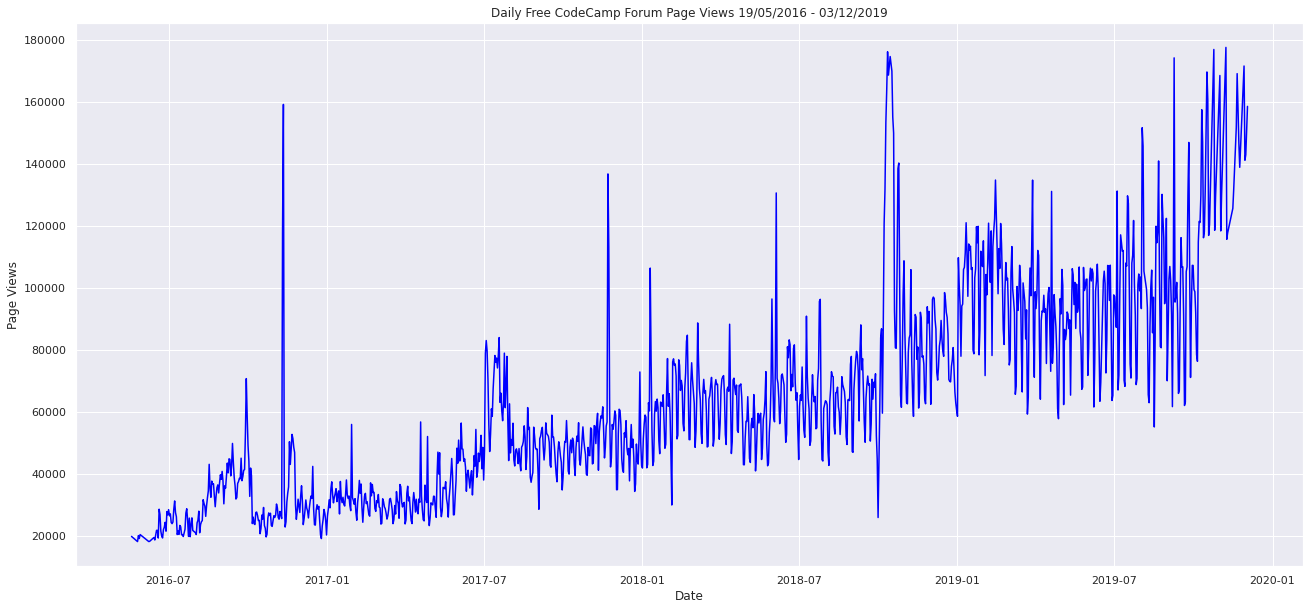

In [14]:
def show_lineplot():
  # set the size for the chart 
  sns.set(rc = {'figure.figsize':(22,10)})

  #define data
  filtered_data = filtered_value["value"]
  ## draw a line chart 
  chart = sns.lineplot(data= filtered_data, color='blue')
  sns.set_style("whitegrid") # set style
  # add a title for the chart
  plt.title("Daily Free CodeCamp Forum Page Views 19/05/2016 - 03/12/2019")
  plt.xlabel("Date") # set xlabel 
  plt.ylabel("Page Views") # set ylabel
  plt.show() # show the chart

show_lineplot()

From the above chart we can see that the page of views have been increasing through out of the years. We can see a few huge spikes and on the chart.  Between year 2016 and 2018 the number of views were very low this might the business was just started and it was facing  an introduction stage not many people known about it, and moreover, in 2016 we only have 8 months data.  

# **Preperation for creating a bar plot** 

**Sorting 'month' in categorical order** 

In order to potting a pivot table there are few steps to go, first of all, we will need to sort the " month" cloumn in categorical order from the alphabetical order shown as above our data. 


In [15]:
# step 1 : to order the month column in categorical order from the alphabetical order 
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
filtered_value["month"] = pd.Categorical(filtered_value["month"], categories = months_categories)
sorted_filtered_value = filtered_value.sort_values(by = "month")
sorted_filtered_value

,value,year,month,day
datetime,,,,
2017-01-12,30960,2017,January,12
2018-01-26,56792,2018,January,26
2017-01-24,33083,2017,January,24
2019-01-29,107881,2019,January,29
2017-01-22,33041,2017,January,22
...,...,...,...,...
2016-12-01,32666,2016,December,1
2016-12-13,32777,2016,December,13
2017-12-01,58830,2017,December,1


**Creating a pivot table**

In [16]:
# the code below which creates a pivot table of month and year
pivot_table = pd.pivot_table(sorted_filtered_value, values = "value", index = "year", columns = "month", aggfunc = np.mean )
pivot_table


month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


**Plotting a bar chart of average view for each month groupby year**


Here I am making a bar plot of month data from 2016 to 2019, For index, I will use 2016. 

<Figure size 626.4x432 with 0 Axes>

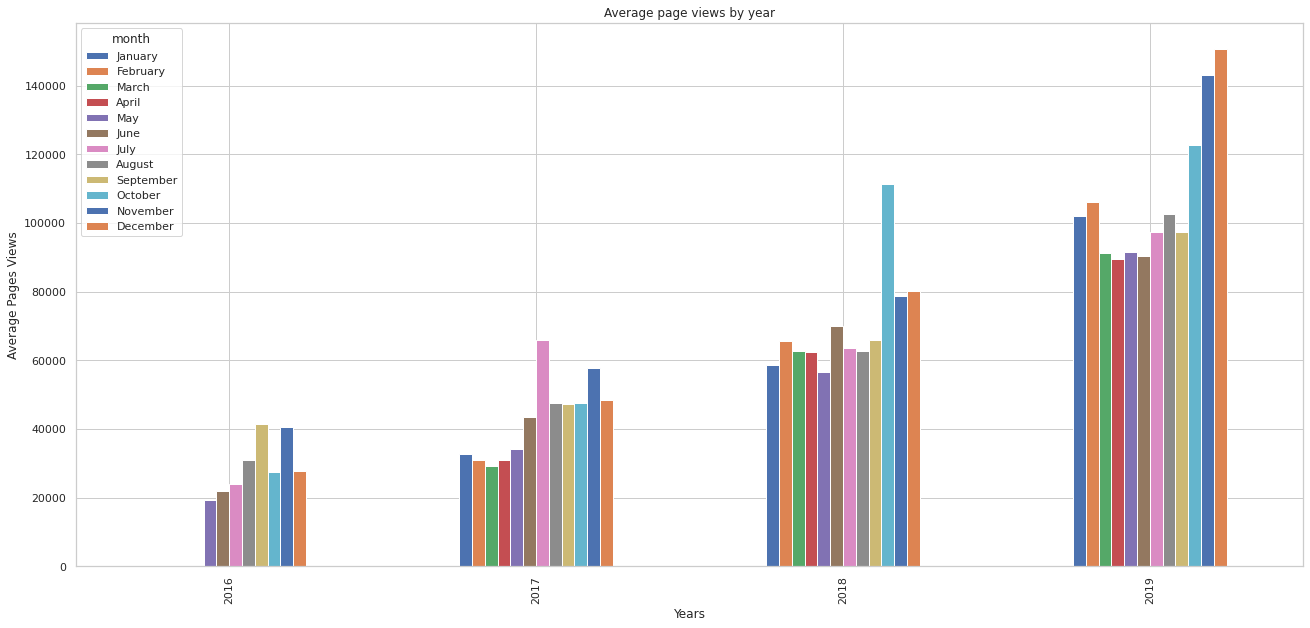

In [17]:
def show_barchart():
  plt.figure(figsize=(8.7, 6))
  pivot_table.plot(kind='bar', xlabel = 'Years', ylabel = 'Average Pages Views', title = 'Average page views by year')
  #legend(bbox_to_anchor=(1.2, 1)
  pivot_table.plot
  plt.show()

show_barchart()



Observation:


*   There are 4 group of bars, there are 44 bars in total. Each bar represents a month. 

*  The bar chart above illustrates the average page views have been increased over the years.


*   2016 only contais 8 months data, so within these months we can see the page veiws quite average apart from September and November.  

*   In year 2017 the top 3 views are in July, November and December.

*   A huge spike in October 2018 the views has been reached 110000+ , followed by December and November which also have had around 80000 views. 

*   2019 is the best year of the average views as over all.  December has had over 140000 views and followed by November and October.  


*   From the chats we also found that Oct, Nov and Decembers are noramlly have higher views copmare to other months. 

 

**Creating a pivot table for Heatmaps**

In [18]:
# the code below which creates a pivot table of month and year
pivot_table2 = pd.pivot_table(sorted_filtered_value, values = "value", index = "month", columns = "year", aggfunc = np.mean )
pivot_table2

year,2016,2017,2018,2019
month,,,,
January,NaN,32785.161290,58580.096774,102056.516129
February,NaN,31113.071429,65679.000000,105968.357143
March,NaN,29369.096774,62693.774194,91214.483871
April,NaN,30878.733333,62350.833333,89368.433333
May,19432.400000,34244.290323,56562.870968,91439.903226
June,21875.105263,43577.500000,70117.000000,90435.642857
July,24109.678571,65806.838710,63591.064516,97236.566667
August,31049.193548,47712.451613,62831.612903,102717.310345
September,41476.866667,47376.800000,65941.733333,97268.833333


A heat map is generally a common type of data visualization that is used everywhere. In time-series data also heat maps can be very useful.

I have created the pivot table above for creating heat map, this time I will set month as an index, let's explore: 

**Cearting a heat map of average page views for each month groupby year**

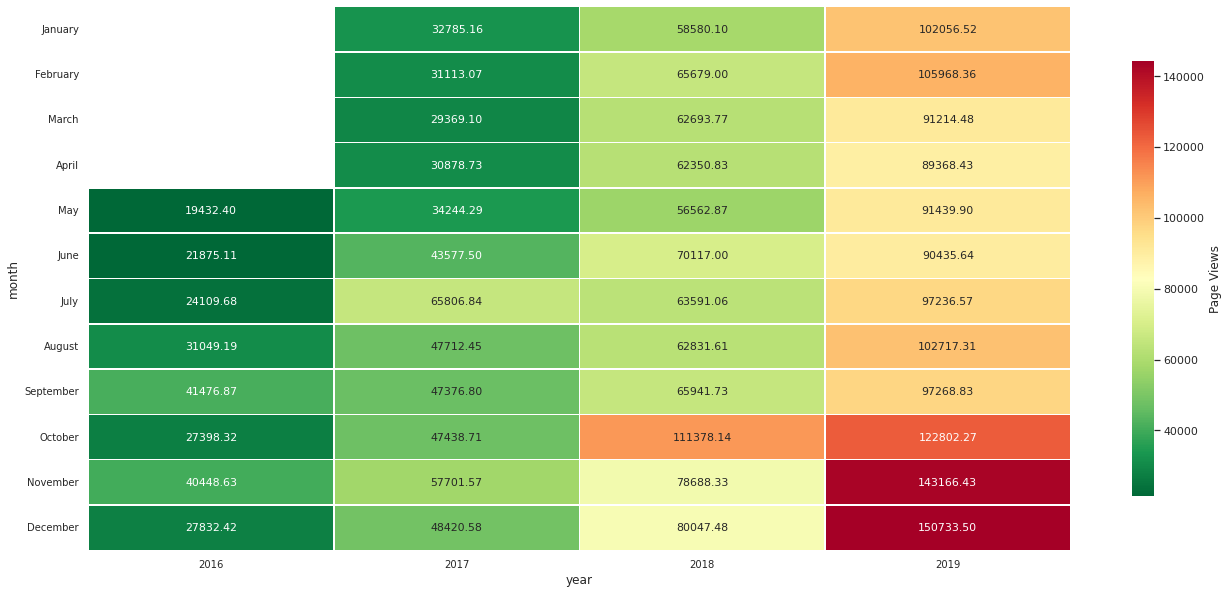

In [110]:
heatmap = sns.heatmap(pivot_table2, cmap='RdYlGn_r', robust=True, fmt='.2f', annot=True, linewidths=.5, annot_kws={'size':11}, cbar_kws={'shrink':.8, 'label':"Page Views"})
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10) 
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, fontsize=10) 
plt.show()


The heat map is ready for us to visualise! The darker red means very high page veiws for instance in December 2019 the number of page views are 150733.50. The dark green very low views in May 2016 we only can see that there is 19432.40 views. 

**Creating Boxplots** 

Now to see which is the month with more views, we can create a box pot, with the accumulative values along all the years.

We will uses Searborn to draw two adjacent box plots, these box plots should show how the values are distributed within a given year or month and how it compares over time. 



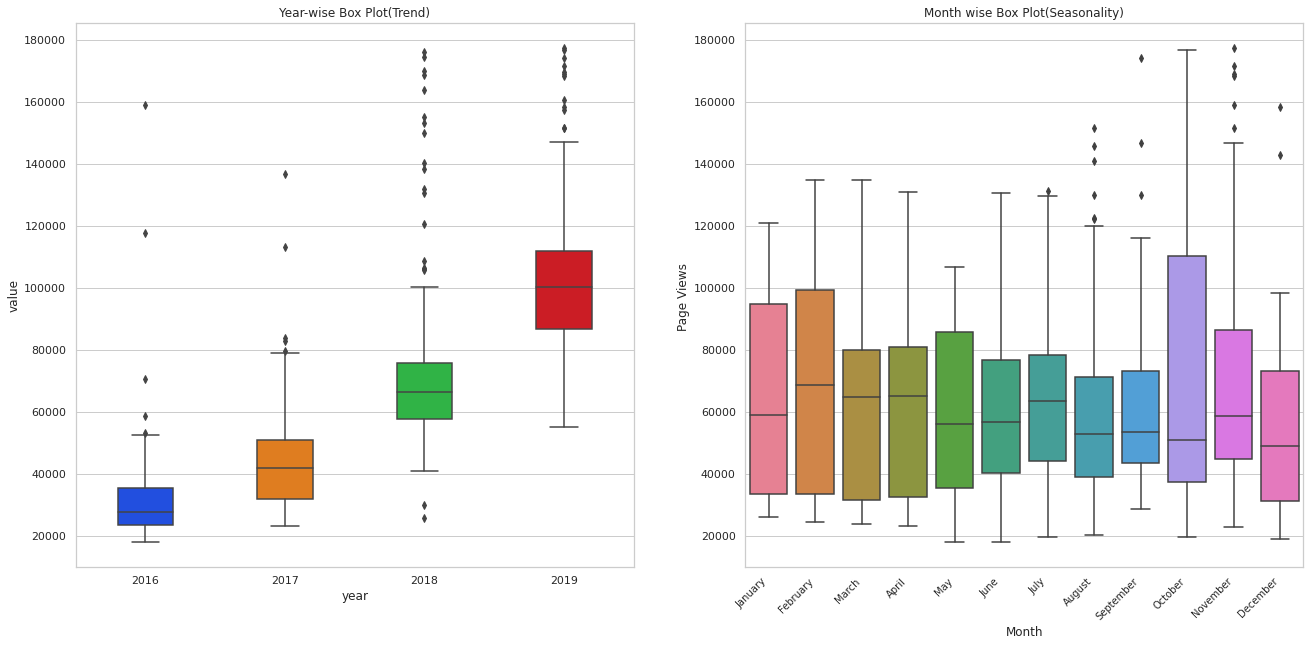

In [19]:
def show_boxplot():

  ### Box Plot : Month wise Box Plot  
  fig, axes = plt.subplots(1,2)
  sns.set(rc = {'figure.figsize':(20,10)})
  sns.boxplot(x= "year", y="value", data = sorted_filtered_value, width = 0.4, palette ="bright", ax=axes[0]).set(title = "Year-wise Box Plot(Trend)")
  plt.xlabel ("Years", size=12)
  plt.ylabel("Page Views ", size=12)
  sns.boxplot(x= "month", y="value", data =sorted_filtered_value, width = 0.8, palette ="husl", ax=axes[1]).set(title ="Month wise Box Plot(Seasonality)");
  plt.xlabel ("Month", size=12)
  plt.ylabel("Page Views ", size=12)
  plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='small')
  plt.show()

show_boxplot()



These box plots output from 2016 to 2019 the page views have been increasing by each year and October, February and January are the months with more accumulative views along all the data.

**Page Views per year predication**

Predict the number of page views in the year 2020 based on the data up to 2019

In this section we will: 

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


LinregressResult(slope=24385.517311982207, intercept=-49137675.65559679, rvalue=0.7932714276471903, pvalue=1.3395933130163022e-268, stderr=532.3830168399693)
Regression slope =  24385.517311982207
Regression intercept = -49137675.65559679
R value =  0.7932714276471903


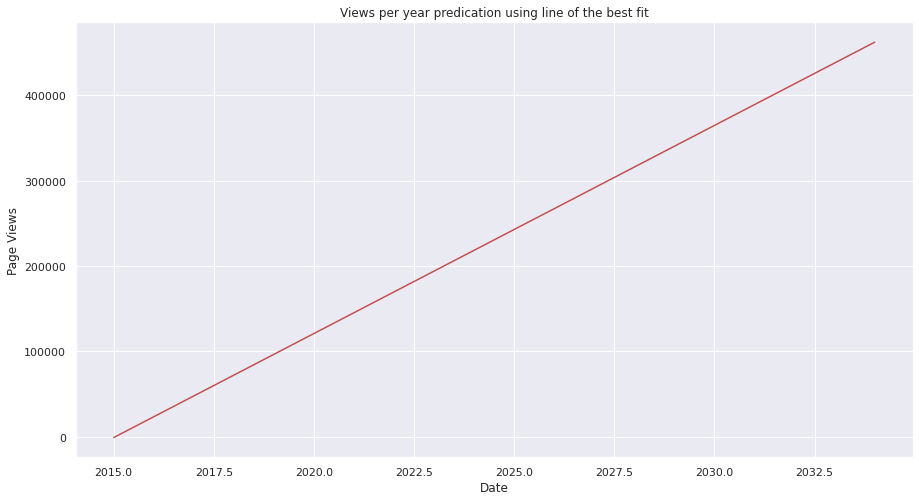

In [ ]:
def get_lineregress(df):
  x = sorted_filtered_value["year"]
  y = sorted_filtered_value["value"]
  regression = linregress(x,y)

  print(regression)
  print("Regression slope = ", regression.slope)
  print("Regression intercept =", regression.intercept)
  print("R value = ", regression[2])

  #plt.plot(x, y, 'o', label='data points')
  guess = np.arange(2015,2035)
  #print(guess)
  plt.plot(guess, regression.intercept + regression.slope*guess, 'r', label='fitted line')

  plt.title("Views per year predication using line of the best fit")
  sns.set(rc = {'figure.figsize':(15,8)})
  plt.xlabel("Date");
  plt.ylabel("Page Views");
  return regression 

regression = get_lineregress(sorted_filtered_value)

**Predication of page views for year 2020, 2025 and 2030**

In [ ]:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
prediction = page_views(2020, regression.slope, regression.intercept)
print(prediction)

121069.31460726261


In [ ]:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
prediction = page_views(2025, regression.slope, regression.intercept)
print(prediction)

242996.90116717666


In [ ]:
def page_views(year, slope, intercept):
  # y = mx + c
  page_views = slope*year + intercept
  return page_views
prediction = page_views(2030, regression.slope, regression.intercept)
print(prediction)

364924.48772708327


From above the "Views per year predication using line of the best fit" line as we can found that the page review for the year 2020, 2025 and 2030 are 121069, 242996 and 364924. 

# Reflection 


I was really enjoyed working with this page view time series analysis project, we anlaysed this time series data to extract meanging statisticis like daily, monthly, yearly growth of page views over the past years and predicated the number of page views for future years. 




Python and other libraries such as Pandas, Seaborn, NumPy and Matplotlib have been used to perform the Time Series Visualizer.  The data was cleaned by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.




I was able to produce the following visualisations line chart, bar charts, heatmaps, boxplots and line regression model. 


*   The line chart demonstrated that the page of views have been increasing through out of these years. 


* Both the the barplots and the heat map showed average daily page views for each month grouped by year. The heatmap illustrated a very high page veiws in December 2019 the number of page views are 150733.50. The very low views in May 2016 with 19432.40 views. The barchart has output a huge spike in October 2018 the views has been reached 110000+ , followed by December and November which also have had around 80000 views.It also agreed that 2019 is the best year of the average views as over all. 


*   The box plots output from 2016 to 2019 the page views have been increasing by each year and October, February and January are the months with more accumulative views along all the data.

*  By creating the liner regression model we can found that the page review will be incresing for year 2020,  and the number of page veiws for the year 2020, 2025 and 2030 are 121069, 242996 and 364924.


